# Reading file that contains data to be clasified as lineal

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

df_linearity = pd.read_csv('./Annex 4 measuring - linearity.csv')

## Testing

In [20]:
df_linearity.head()

,Part,Reference,Measurement
0,1,1.49,1.49
1,2,1.59,1.59
2,3,1.69,1.69
3,4,1.79,1.80
4,5,1.49,1.50


## Quick look at statistics

In [21]:
df_linearity.describe()

,Part,Reference,Measurement
count,24.000000,24.000000,24.000000
mean,6.500000,1.640000,1.645000
std,3.526299,0.114208,0.113865
min,1.000000,1.490000,1.480000
25%,3.750000,1.565000,1.570000
50%,6.500000,1.640000,1.640000
75%,9.250000,1.715000,1.727500
max,12.000000,1.790000,1.810000


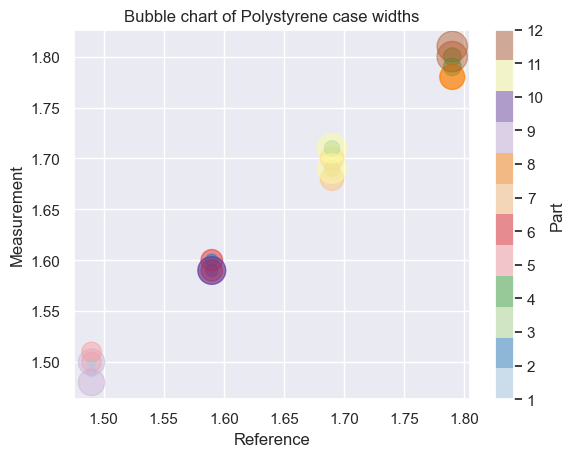

In [22]:
# Crear un DataFrame de pandas
df = pd.DataFrame(df_linearity)
# Crear un gráfico de burbujas
scatter = plt.scatter(df['Reference'], df['Measurement'], s=df['Part']*40, alpha=0.45, c=df['Part'], cmap='Paired')
# Etiquetas y título
plt.xlabel('Reference')
plt.ylabel('Measurement')
plt.title('Bubble chart of Polystyrene case widths')
# Barra de colores
cbar = plt.colorbar(scatter, ticks=df['Part'].unique())
cbar.set_label('Part')
# Mostrar el gráfico
plt.show()

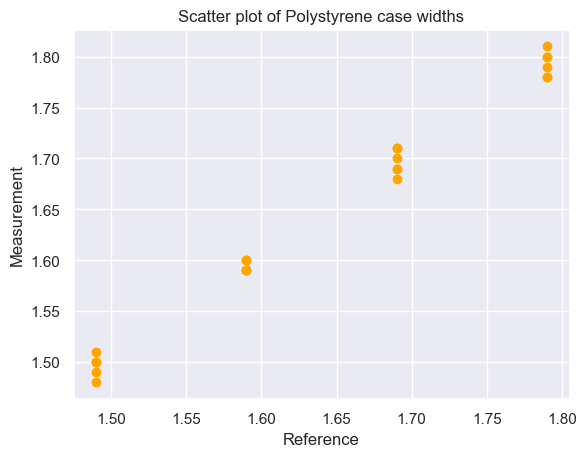

In [23]:
plt.scatter(df_linearity['Reference'], df_linearity['Measurement'], color='orange')
plt.xlabel('Reference')
plt.ylabel('Measurement')
plt.title('Scatter plot of Polystyrene case widths')
plt.show()

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


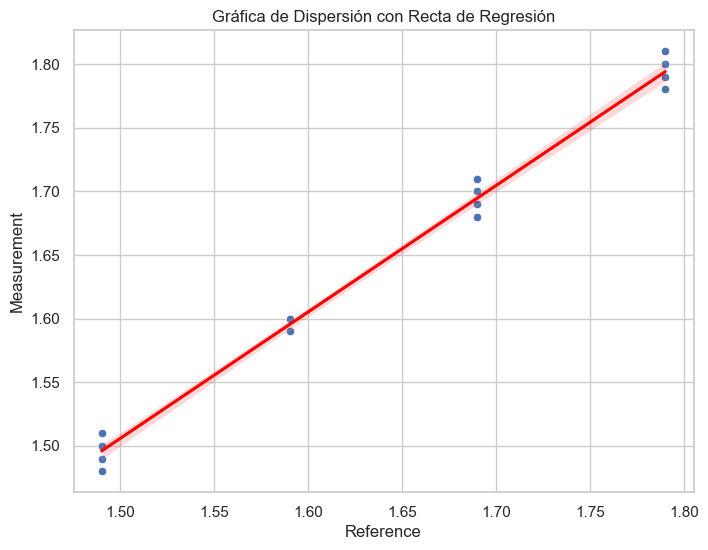

In [24]:
# Crear la gráfica de dispersión con la recta de regresión
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

scatter_plot = sns.scatterplot(x='Reference', y='Measurement', data=df)
sns.regplot(x='Reference', y='Measurement', data=df, scatter=False, ax=scatter_plot, color='red')

# Añadir etiquetas y título
plt.xlabel('Reference')
plt.ylabel('Measurement')
plt.title('Gráfica de Dispersión con Recta de Regresión')

# Mostrar la gráfica
plt.show()


## Bias

In [29]:
df

,Part,Reference,Measurement,Sesgo
0,1,1.49,1.49,0.00
1,2,1.59,1.59,0.00
2,3,1.69,1.69,0.00
3,4,1.79,1.80,0.01
4,5,1.49,1.50,0.01
5,6,1.59,1.60,0.01
6,7,1.69,1.70,0.01
7,8,1.79,1.78,-0.01
8,9,1.49,1.50,0.01
9,10,1.59,1.59,0.00


In [26]:
df_sorted = df.sort_values(by = "Reference")
df_sorted

,Part,Reference,Measurement
0,1,1.49,1.49
16,5,1.49,1.51
12,1,1.49,1.50
4,5,1.49,1.50
8,9,1.49,1.50
20,9,1.49,1.48
13,2,1.59,1.60
17,6,1.59,1.59
9,10,1.59,1.59
5,6,1.59,1.60


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


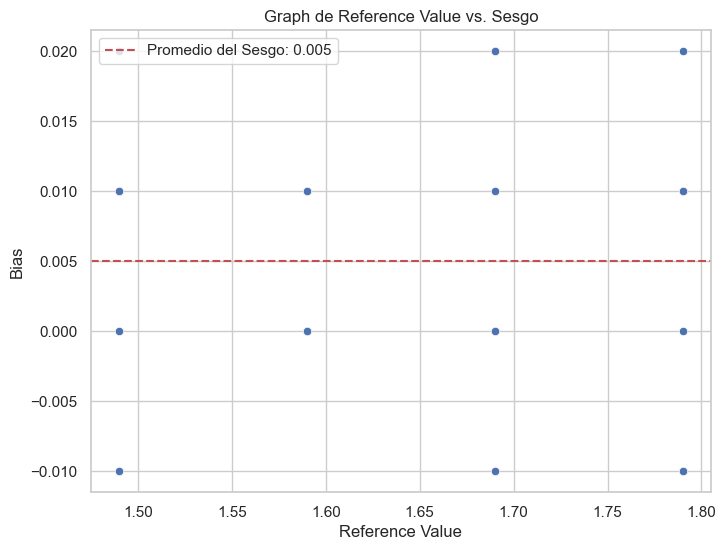

In [30]:
# Calculate bias
df['Bias'] = df['Measurement'] - df['Reference']

average_bias = df['Bias'].mean()

# Crear la gráfica 'Reference Value' vs. 'Sesgo'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

scatter_plot = sns.scatterplot(x='Reference', y='Bias', data=df)

# Agregar línea horizontal para el promedio del sesgo
plt.axhline(y=average_bias, color='r', linestyle='--', label=f'Promedio del Sesgo: {average_bias:.3f}')


# Añadir etiquetas y título
plt.xlabel('Reference Value')
plt.ylabel('Bias')
plt.title('Graph de Reference Value vs. Sesgo')

# Mostrar la leyenda
plt.legend()
# Mostrar la gráfica
plt.show()

# Calculating bias and linearity

In [28]:

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Reference'], df['Measurement'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Verify linearity
if p_value < 0.05:
    print("There is statistical evidence of linearity in the process.")
else:
    print("There is insufficient statistical evidence of linearity in the process.")

Slope: 0.9933333333333334
Intercept: 0.015933333333333577
R-squared: 0.9926671137938744
P-value: 5.5626822828166845e-25
There is statistical evidence of linearity in the process.
